# <center>Fashion MNIST Dataset</center>
## <center>Exploratory Data Analysis + Data Visualization + Modelling</center>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from warnings import filterwarnings
filterwarnings('ignore')
print('Libraries imported!')

Libraries imported!


In [2]:
train_data = pd.read_csv(r'C:\Users\Haluk Sumen\Desktop\Projects & Dataset\Fashion Mnist\fashion-mnist_train.csv')
test_data = pd.read_csv(r'C:\Users\Haluk Sumen\Desktop\Projects & Dataset\Fashion Mnist\fashion-mnist_test.csv')

## Exploratory Data Analysis

In [3]:
print("Fashion MNIST Train -  Rows:",train_data.shape[0]," Columns:", train_data.shape[1])
print("Fashion MNIST Test  -  Rows:",test_data.shape[0]," Columns:", test_data.shape[1])

Fashion MNIST Train -  Rows: 60000  Columns: 785
Fashion MNIST Test  -  Rows: 10000  Columns: 785


In [4]:
# Creating a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [5]:
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        print("{:<15s}:{}".format(label, count))

In [6]:
#Data Distribution of Train Data
print("Train Data Item Distribution")
get_classes_distribution(train_data)

Train Data Item Distribution
Ankle Boot     :6000
Bag            :6000
Sneaker        :6000
Shirt          :6000
Sandal         :6000
Coat           :6000
Dress          :6000
Pullover       :6000
Trouser        :6000
T-shirt/top    :6000


In [7]:
#Data Distribution of Test Data
print("Test Data Item Distribution")
get_classes_distribution(test_data)

Test Data Item Distribution
Sneaker        :1000
Shirt          :1000
Sandal         :1000
Coat           :1000
Dress          :1000
Pullover       :1000
Ankle Boot     :1000
Trouser        :1000
Bag            :1000
T-shirt/top    :1000


## Data Visualization

In [8]:
# Creating sample images list
def sample_images_data(data):
    sample_images = []
    sample_labels = []

    for k in labels.keys():
        
        samples = data[data["label"] == k].head(5)
        
        for j, s in enumerate(samples.values):
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])
    return sample_images, sample_labels

In [9]:
train_sample_images, train_sample_labels = sample_images_data(train_data)

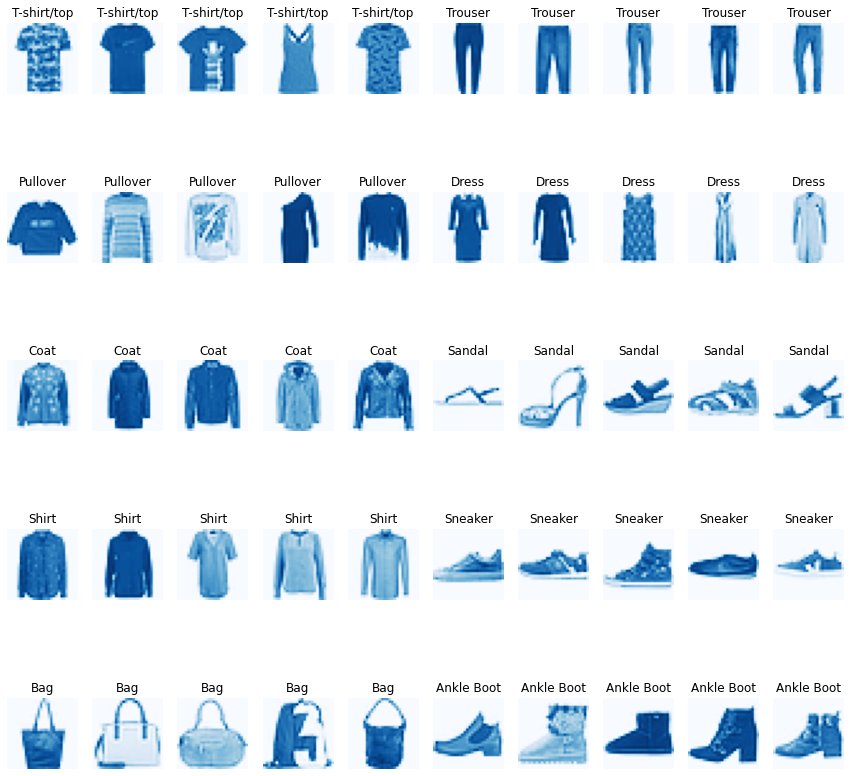

In [10]:
# Plotting Sample Images
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
  
    fig, axes = plt.subplots(5,10, figsize=(15,15))

    for i, img in enumerate(data_sample_images):
        axes[i//10, i%10].imshow(img, cmap=cmap)
        axes[i//10, i%10].set_title(labels[data_sample_labels[i]])
        axes[i//10, i%10].axis('off')
    plt.show()    
# Train Sample Images
plot_sample_images(train_sample_images,train_sample_labels, "Blues")

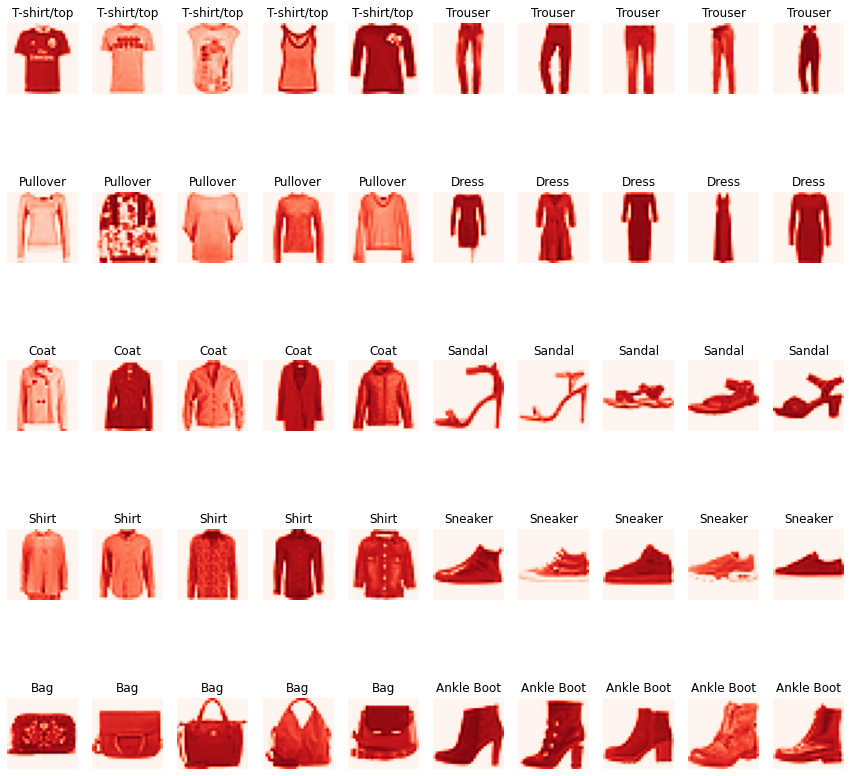

In [11]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels, "Reds")

## Data Preprocessing

In [12]:
def data_preprocessing(raw):
    out_y = keras.utils.np_utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [13]:
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=4096)

In [15]:
print("Fashion MNIST Train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST Test  -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])
print("Fashion MNIST Valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])

Fashion MNIST Train -  rows: 42000  columns: (28, 28, 1)
Fashion MNIST Test  -  rows: 10000  columns: (28, 28, 1)
Fashion MNIST Valid -  rows: 18000  columns: (28, 28, 1)


In [16]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    fig, axes = plt.subplots(1,1, figsize=(15,8))
    g = sns.countplot(ydf[0], order = np.arange(0,10), palette="Set2")
    g.set_title("# of Items for Each Class in the Dataset")
    g.set_xlabel("Category")
    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height())) 

In [17]:
def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)

    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        print("{:<15s}:{}".format(label, count))

Ankle Boot     :4233
Trouser        :4233
Coat           :4232
Shirt          :4227
Sneaker        :4224
Sandal         :4185
T-shirt/top    :4185
Dress          :4181
Pullover       :4162
Bag            :4138


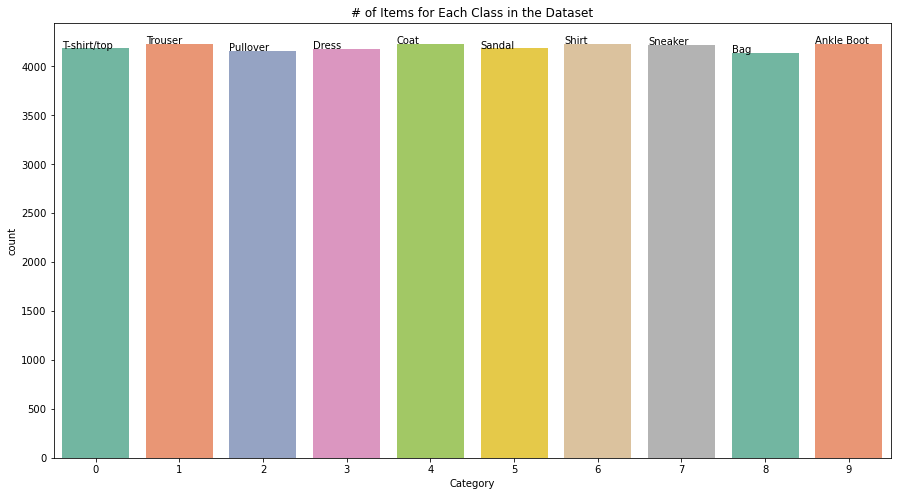

In [18]:
#Training Set Type Distribution
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

Bag            :1862
Pullover       :1838
Dress          :1819
Sandal         :1815
T-shirt/top    :1815
Sneaker        :1776
Shirt          :1773
Coat           :1768
Ankle Boot     :1767
Trouser        :1767


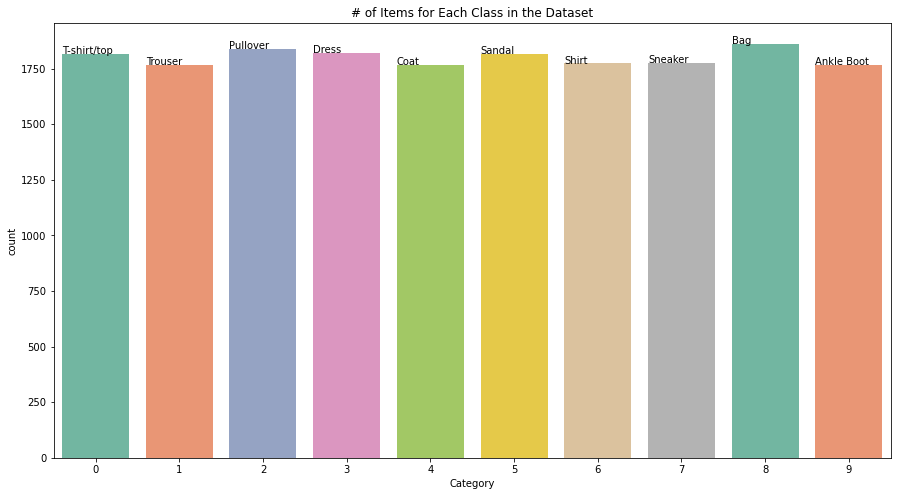

In [19]:
#Validation Set Type Distribution
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

## Data Modelling

In [20]:
model = Sequential()
# Add convolution 2D and Dropouts
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [23]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
329/329 [==============================] - 18s 54ms/step - loss: 0.7733 - accuracy: 0.7161 - val_loss: 0.4782 - val_accuracy: 0.8181
Epoch 2/50
329/329 [==============================] - 19s 57ms/step - loss: 0.4856 - accuracy: 0.8207 - val_loss: 0.3900 - val_accuracy: 0.8592
Epoch 3/50
329/329 [==============================] - 18s 55ms/step - loss: 0.4161 - accuracy: 0.8453 - val_loss: 0.3357 - val_accuracy: 0.8743
Epoch 4/50
329/329 [==============================] - 19s 59ms/step - loss: 0.3788 - accuracy: 0.8618 - val_loss: 0.3196 - val_accuracy: 0.8817
Epoch 5/50
329/329 [==============================] - 20s 61ms/step - loss: 0.3532 - accuracy: 0.8719 - val_loss: 0.3061 - val_accuracy: 0.8893
Epoch 6/50
329/329 [==============================] - 21s 65ms/step - loss: 0.3366 - accuracy: 0.8769 - val_loss: 0.2856 - val_accuracy: 0.8956
Epoch 7/50
329/329 [==============================] - 21s 65ms/step - loss: 0.3228 - accuracy: 0.8811 - val_loss: 0.2705 - val_accuracy:

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.21135303378105164
Test Accuracy: 0.926800012588501


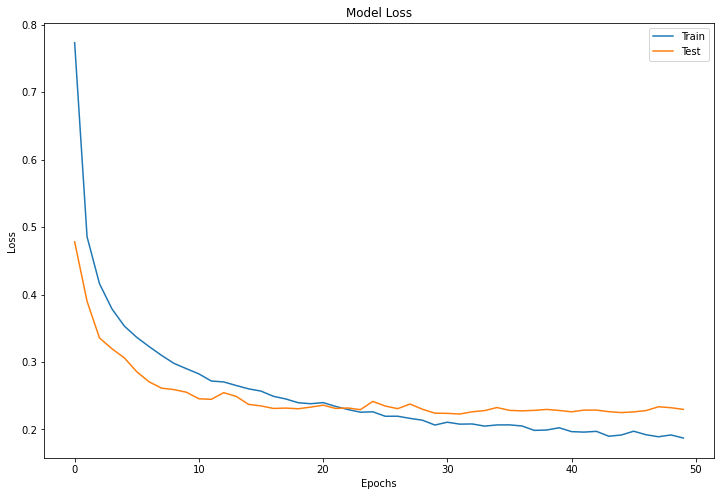

In [42]:
# Plot of Model Loss
plt.figure(figsize=(12,8))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title("Loss of Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

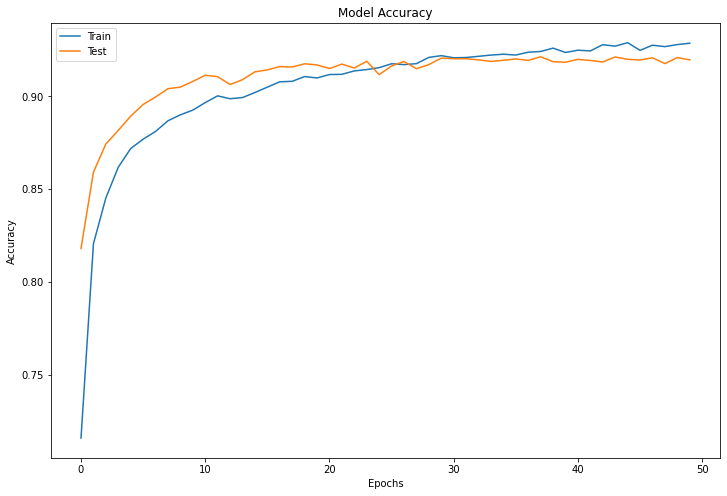

In [43]:
# Plot of Accuracy
plt.figure(figsize=(12,8))
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title("Accuracy of Model")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Result

In [50]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

In [51]:
target_names = ["{} :".format(labels[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

               precision    recall  f1-score   support

T-shirt/top :       0.86      0.89      0.88      1000
    Trouser :       1.00      0.99      0.99      1000
   Pullover :       0.87      0.89      0.88      1000
      Dress :       0.93      0.94      0.93      1000
       Coat :       0.89      0.87      0.88      1000
     Sandal :       0.98      0.99      0.99      1000
      Shirt :       0.81      0.79      0.80      1000
    Sneaker :       0.94      0.98      0.96      1000
        Bag :       0.98      0.99      0.99      1000
 Ankle Boot :       0.99      0.95      0.97      1000

     accuracy                           0.93     10000
    macro avg       0.93      0.93      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



In [52]:
# Creating List for Correctly Predicted Labels
correct = []
for i in range(len(y_test)):
    if(predicted_classes[i] == y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : 6\nActual Label : 6')

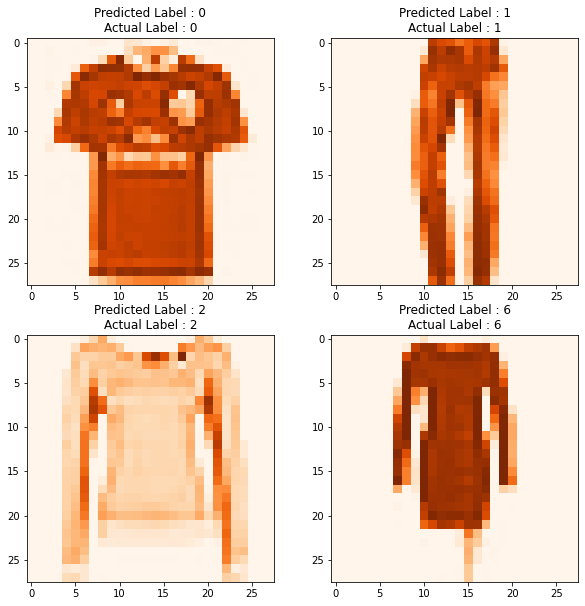

In [53]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test[correct[0]].reshape(28,28), cmap='Oranges')
ax[0,0].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[correct[0]]]))
ax[0,1].imshow(X_test[correct[1]].reshape(28,28), cmap='Oranges')
ax[0,1].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[correct[1]]]))
ax[1,0].imshow(X_test[correct[2]].reshape(28,28), cmap='Oranges')
ax[1,0].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[correct[2]]]))
ax[1,1].imshow(X_test[correct[3]].reshape(28,28), cmap='Oranges')
ax[1,1].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[correct[3]]]))

In [54]:
# Creating List for Incorrectly Predicted Labels
false = []
for i in range(len(y_test)):
    if(predicted_classes[i] != y_true[i]):
        false.append(i)
    if(len(false) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : 3\nActual Label : 8')

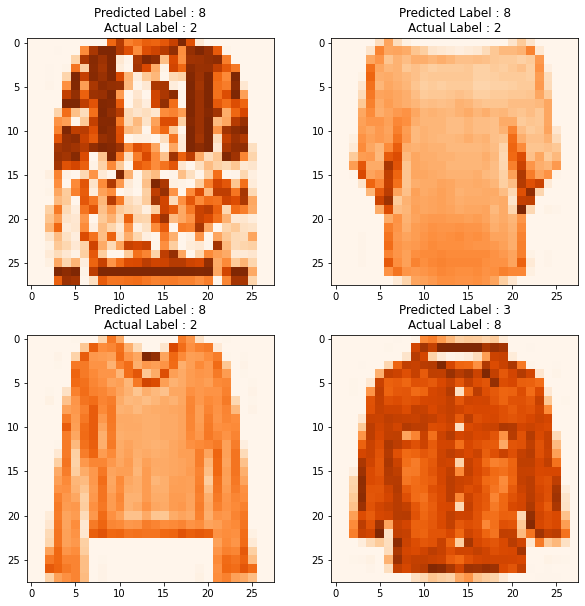

In [55]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test[false[0]].reshape(28,28), cmap='Oranges')
ax[0,0].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[false[0]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[false[0]]]))
ax[0,1].imshow(X_test[false[1]].reshape(28,28), cmap='Oranges')
ax[0,1].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[false[1]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[false[1]]]))
ax[1,0].imshow(X_test[false[2]].reshape(28,28), cmap='Oranges')
ax[1,0].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[false[2]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[false[2]]]))
ax[1,1].imshow(X_test[false[3]].reshape(28,28), cmap='Oranges')
ax[1,1].set_title("Predicted Label : " + str(predicted_classes[predicted_classes[false[3]]]) + "\n"+"Actual Label : " + 
                 str(predicted_classes[y_true[false[3]]]))